In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 50)

In [9]:
Train = pd.read_csv(r"C:\Users\59898\Desktop\proyect\model\data\credit-data-2010\train\train.csv",  encoding = "ISO-8859-1", sep = ",")

C:\Users\59898\AppData\Local\Temp\ipykernel_106008\128875240.py:1: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  Train = pd.read_csv(r"C:\Users\59898\Desktop\proyect\model\data\credit-data-2010\train\train.csv",  encoding = "ISO-8859-1", sep = ",")


### Dataset is Balanced ?

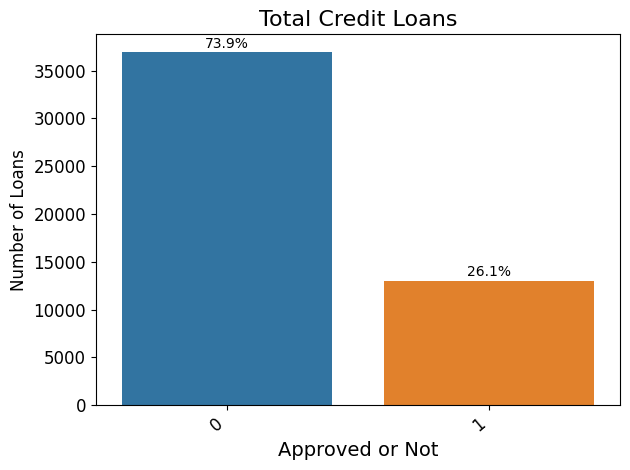

In [10]:
# First Problem the Dataset is Not Balanced
ax = sns.countplot(data = Train, x = 'TARGET_LABEL_BAD=1')
plt.xticks(size=12)
plt.xlabel('Approved or Not', size=14)
plt.yticks(size=12)
plt.ylabel('Number of Loans', size=12)
plt.title("Total Credit Loans", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(Train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

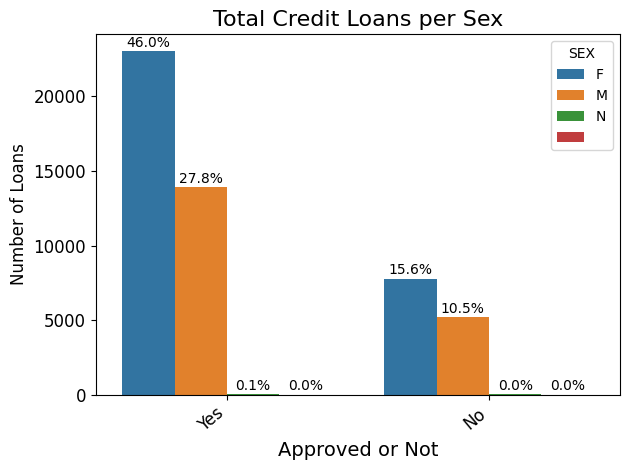

In [11]:
ax = sns.countplot(data = Train, x = 'TARGET_LABEL_BAD=1', hue = "SEX")
plt.xticks(size=12)
plt.xlabel('Approved or Not', size=14)
ax.set_xticklabels(["Yes", "No"])
plt.yticks(size=12)
plt.ylabel('Number of Loans', size=12)
plt.title("Total Credit Loans per Sex", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(Train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

### Columns dtypes count

In [12]:
# Columns dtypes count
Train.dtypes.value_counts()

int64      25
object     19
float64     9
dtype: int64

### Missing Values

In [13]:
# Function to calculate missing values by column
def missing_values_table(df):
       
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [14]:
# Missing values per column
# Columns with more than 30% of missing values will be eliminated
missing_values = missing_values_table(Train)
missing_values

Your selected dataframe has 53 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
PROFESSIONAL_CITY,33783,67.6
PROFESSIONAL_BOROUGH,33783,67.6
MATE_PROFESSION_CODE,28884,57.8
PROFESSION_CODE,7756,15.5
OCCUPATION_TYPE,7313,14.6
MONTHS_IN_RESIDENCE,3777,7.6
RESIDENCE_TYPE,1349,2.7
PROFESSIONAL_ZIP_3,1,0.0


### Object Features composition

In [15]:
# Object column features composition 
Train_objects_df = pd.DataFrame(index = range(10))
for col in Train.columns:
    if Train[col].dtype == "object":
        Train_objects_df[col] = pd.Series(Train[col].value_counts(normalize=True).head(10).values)
Train_objects_df.loc['Total']= Train_objects_df.sum()
Train_objects_df  = Train_objects_df.fillna(" ")

# Columns in which the 10 most frequent components do not reach more after normalization, than 50 percent will be eliminated to save complexity
Train_objects_df

,CLERK_TYPE,APPLICATION_SUBMISSION_TYPE,SEX,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,FLAG_MOBILE_PHONE,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,FLAG_ACSP_RECORD,RESIDENCIAL_ZIP_3
0,1.0,0.56412,0.6161,0.11434,0.04128,0.17546,0.01788,0.08338,0.83618,0.16424,1.0,0.55918,0.68614,0.025837,0.229821,0.7302,0.73064,1.0,0.01442
1,,0.38922,0.3826,0.11390,0.02368,0.10522,0.01752,0.00850,0.16382,0.09116,,0.44082,0.04800,0.020842,0.057347,0.2698,0.02914,,0.01094
2,,0.04666,0.00096,0.10034,0.01562,0.09982,0.01428,0.00744,,0.05730,,,0.04184,0.020411,0.031448,,0.02218,,0.01016
3,,,0.00034,0.09572,0.01562,0.09238,0.01302,0.00694,,0.05660,,,0.02840,0.019979,0.019732,,0.01962,,0.00918
4,,,,0.08196,0.01530,0.07340,0.01248,0.00474,,0.04594,,,0.02774,0.017204,0.017759,,0.01288,,0.00888
5,,,,0.07552,0.01368,0.06170,0.01130,0.00354,,0.03254,,,0.02502,0.016403,0.010668,,0.00972,,0.00728
6,,,,0.04128,0.00750,0.04494,0.01114,0.00310,,0.02914,,,0.01804,0.013874,0.005118,,0.00930,,0.00700
7,,,,0.04016,0.00716,0.04286,0.01022,0.00302,,0.02842,,,0.01420,0.013258,0.004995,,0.00882,,0.00690
8,,,,0.03942,0.00660,0.04054,0.00968,0.00300,,0.02636,,,0.01164,0.012024,0.004501,,0.00826,,0.00680
9,,,,0.03652,0.00644,0.03388,0.00948,0.00278,,0.02462,,,0.01140,0.011284,0.003515,,0.00822,,0.00662


### Columns with one variable only

In [16]:
# Drop unique variable columns they dont apport nothing
for col in Train.columns:
    if Train[col].nunique() == 1:
        print(col)

CLERK_TYPE
QUANT_ADDITIONAL_CARDS
EDUCATION_LEVEL
FLAG_MOBILE_PHONE
FLAG_HOME_ADDRESS_DOCUMENT
FLAG_RG
FLAG_CPF
FLAG_INCOME_PROOF
FLAG_ACSP_RECORD


### Personal Economy

In [17]:
Train

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,0,0,0,0,1,N,32,595,595.0,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,0,0,0,0,1,N,34,230,230.0,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,0,0,0,0,1,N,27,591,591.0,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545.0,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,0,0,0,0,1,N,48,235,235.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,N,,NaN,NaN,N,,0,9.0,4.0,0.0,0,0,0,0,1,N,36,591,591.0,1
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186.0,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,GUARULHOS,ITAPEGICA,Y,5,0,9.0,2.0,NaN,0,0,0,0,1,N,41,715,715.0,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29,1.0,NaN,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,Y,MG,BETIM,JARDIM ALTEROSA,Y,29,0,9.0,2.0,NaN,0,0,0,0,1,N,28,320,320.0,1


In [18]:
Train.groupby([ "OCCUPATION_TYPE"])["PERSONAL_MONTHLY_INCOME"].mean()

OCCUPATION_TYPE
0.0    1223.518651
1.0     813.846555
2.0     882.990703
3.0    1209.573887
4.0     791.099537
5.0    1070.075648
Name: PERSONAL_MONTHLY_INCOME, dtype: float64

In [19]:
Train.groupby("PROFESSION_CODE")["PERSONAL_MONTHLY_INCOME"].mean()

PROFESSION_CODE
0.0     1083.663559
1.0     1847.115000
2.0      732.184040
3.0     1338.362778
4.0     1658.558519
5.0     1380.549167
6.0     1011.957721
7.0     9465.524537
8.0     2036.103819
9.0      852.003893
10.0     998.128212
11.0     805.487061
12.0     947.268119
13.0     651.704313
14.0     757.703333
15.0     792.930635
16.0     917.774331
17.0     887.154000
18.0     477.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64

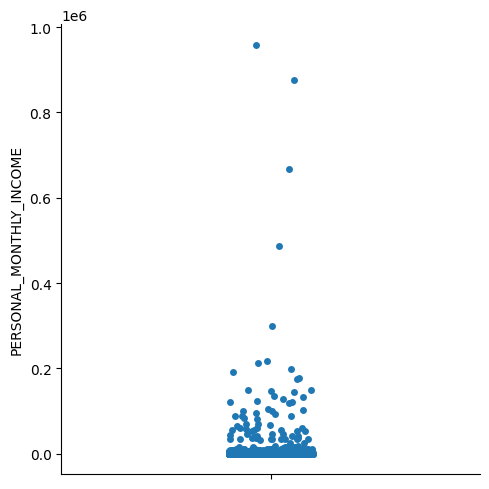

In [20]:
# Here we have some Outliers
sns.catplot( y = Train["PERSONAL_MONTHLY_INCOME"])

<AxesSubplot:xlabel='AGE', ylabel='Density'>

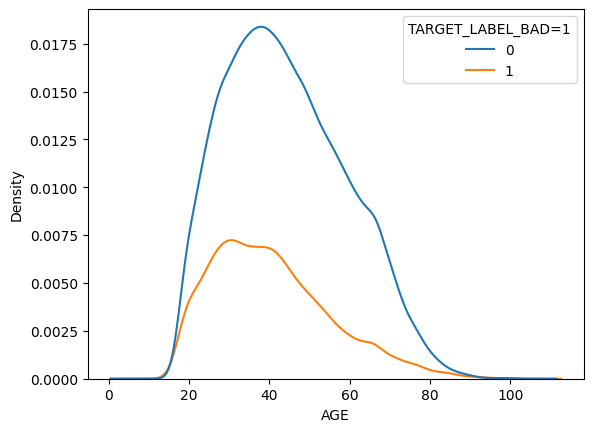

In [21]:
sns.kdeplot(data = Train, x = "AGE", hue = "TARGET_LABEL_BAD=1")

In [22]:
# Drop low variance features
Train.describe()

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,42244.000000,42687.000000,21116.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,49999.000000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,0.009320,8.061784,2.484316,3.797926,0.0,0.0,0.0,0.0,1.275700,43.24852,585.165803,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,0.383453,3.220104,1.532261,5.212168,0.0,0.0,0.0,0.0,0.988286,14.98905,227.775154,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,105.000000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,450.000000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,600.000000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,737.000000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,18.000000,5.000000,17.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,999.000000,1.000000


In [23]:
# Drop low variance features
Train.describe(exclude="number")

,CLERK_TYPE,APPLICATION_SUBMISSION_TYPE,SEX,STATE_OF_BIRTH,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,FLAG_MOBILE_PHONE,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,FLAG_ACSP_RECORD,RESIDENCIAL_ZIP_3
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,16217,16217,50000,50000,50000,50000
unique,1,3,4,29,9910,27,3529,14511,2,102,1,2,28,2236,5057,2,87,1,1481
top,C,Web,F,BA,,SP,Sao Paulo,CENTRO,Y,,N,N,,FORTALEZA,CENTRO,N,,N,960
freq,50000,28206,30805,5717,2064,8773,894,4169,41809,8212,50000,27959,34307,419,3727,36510,36532,50000,721


In [24]:
Train

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,0,0,0,0,1,N,32,595,595.0,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,0,0,0,0,1,N,34,230,230.0,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,0,0,0,0,1,N,27,591,591.0,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545.0,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,0,0,0,0,1,N,48,235,235.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,N,,NaN,NaN,N,,0,9.0,4.0,0.0,0,0,0,0,1,N,36,591,591.0,1
49996,49997,C,25,0,0,1,F,1,0,0,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186.0,0
49997,49998,C,5,Web,0,1,M,2,3,0,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,GUARULHOS,ITAPEGICA,Y,5,0,9.0,2.0,NaN,0,0,0,0,1,N,41,715,715.0,0
49998,49999,C,1,Web,0,1,F,1,1,0,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29,1.0,NaN,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,Y,MG,BETIM,JARDIM ALTEROSA,Y,29,0,9.0,2.0,NaN,0,0,0,0,1,N,28,320,320.0,1


In [25]:
Train.groupby("PROFESSION_CODE")["PERSONAL_MONTHLY_INCOME"].mean()

PROFESSION_CODE
0.0     1083.663559
1.0     1847.115000
2.0      732.184040
3.0     1338.362778
4.0     1658.558519
5.0     1380.549167
6.0     1011.957721
7.0     9465.524537
8.0     2036.103819
9.0      852.003893
10.0     998.128212
11.0     805.487061
12.0     947.268119
13.0     651.704313
14.0     757.703333
15.0     792.930635
16.0     917.774331
17.0     887.154000
18.0     477.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64

<AxesSubplot:xlabel='PROFESSION_CODE', ylabel='count'>

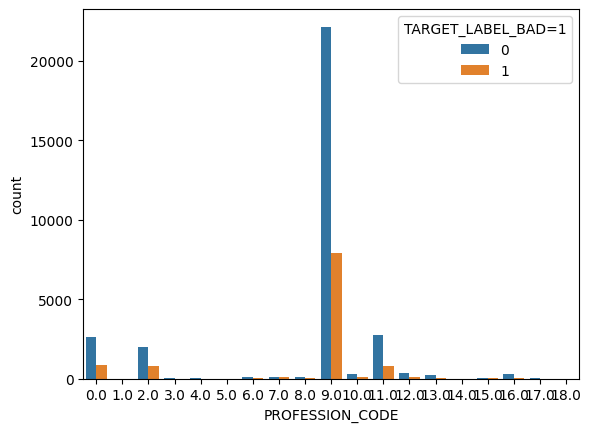

In [26]:
sns.countplot(data = Train, x = "PROFESSION_CODE", hue = "TARGET_LABEL_BAD=1")

### Conclusion

Columns with one variable will be droped
Columns with more than 30 % of missing values will be droped
We need to change some data columns dtypes like POSTAL_ADDRESS_TYPE, MARITAL_STATUS
Outliers in QUANT_DEPENDANTS, PERSONAL_MONTHLY_INCOME, MONTHS_IN_RESIDENCE, OTHER_INCOMES, PERSONAL_ASSETS_VALUE, MONTHS_IN_THE_JOB???YEARS???
We can do some feature extraction with the 4 column of cards